<a href="https://colab.research.google.com/github/vinothini-28/sentimental_analysis/blob/main/sentimentalanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




Sentimental Analysis in python :

Here we are using **Amazon fine food review** dataset

Dataset link:
https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews?resource=download

Models:

1.VADER

2.Roberta pretrained model

3.Hugging face pipeline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
!pip install nltk
import nltk

Read the dataset

In [52]:
df = pd.read_csv("Reviews.csv")
df=df.head(1000)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      1000 non-null   int64 
 1   ProductId               1000 non-null   object
 2   UserId                  1000 non-null   object
 3   ProfileName             1000 non-null   object
 4   HelpfulnessNumerator    1000 non-null   int64 
 5   HelpfulnessDenominator  1000 non-null   int64 
 6   Score                   1000 non-null   int64 
 7   Time                    1000 non-null   int64 
 8   Summary                 1000 non-null   object
 9   Text                    1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [54]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [55]:
df.shape

(1000, 10)

EDA

Based on score  we are going to visualize the data

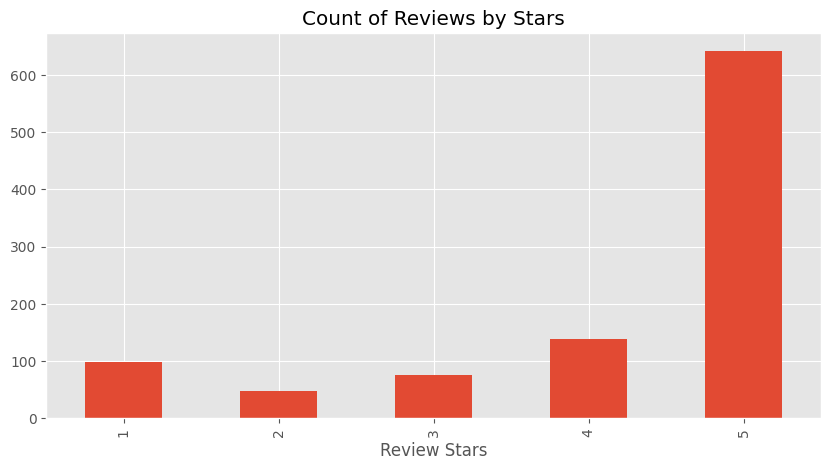

In [56]:
ax=df['Score'].value_counts().sort_index()\
.plot(kind='bar',
     title='Count of Reviews by Stars',
     figsize=(10,5))
ax.set_xlabel('Review Stars')
plt.show()

NLTK

In [57]:
example=df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [58]:
nltk.download('punkt')
token=nltk.word_tokenize(example)
token

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [59]:
nltk.download('averaged_perceptron_tagger')
tagged=nltk.pos_tag(token)
tagged

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

In [60]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


STEP 1:VADER MODEL

VADER is **Valence Aware Dictionary and sEntiment Reasoner**. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It is capable of understanding the context of words, punctuation, capitalization, and even slang, which makes it particularly useful for analyzing text in social media posts, reviews, and similar contexts.

USE OF NLTK'S SentimentIntensityAnalyzer to get the neg/neu/pos score of the text.


use "bag of words" approach:



*   stop words are removed
*   each word is scored and combined to a total score



In [61]:
# Step 1: Install the required packages
!pip install nltk tqdm

# Step 2: Import the necessary modules
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# Step 3: Download the vader_lexicon
nltk.download('vader_lexicon')

# Step 4: Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Example usage
# Step 1: Install the required packages
!pip install nltk tqdm

# Step 2: Import the necessary modules
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# Step 3: Download the vader_lexicon
nltk.download('vader_lexicon')

# Step 4: Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()




[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


example of how it works:

In [62]:
# Example usage
# positive comment score
text = "I love using VADER for sentiment analysis!"
sentiment = sia.polarity_scores(text)
print(sentiment)

{'neg': 0.0, 'neu': 0.527, 'pos': 0.473, 'compound': 0.6696}


In [63]:
#negative comment score
text2="i hate icecream"
sentiment2=sia.polarity_scores(text2)
print(sentiment2)

{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}


In [64]:
example_score=sia.polarity_scores(example)
print(example_score)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}


In [65]:
# running the polarity score in entire dataset
res={}
for i, row in tqdm(df.iterrows(),total=len(df)):
  text=row['Text']
  myid=row['Id']
  res[myid]=sia.polarity_scores(text)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [66]:
vader=pd.DataFrame(res).T
vader=vader.reset_index().rename(columns={'index':'Id'})
vader=vader.merge(df,how='left')

In [67]:
vader.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


plot vader result

In [68]:
df['Score'].value_counts()

Score
5    642
4    138
1     98
3     75
2     47
Name: count, dtype: int64

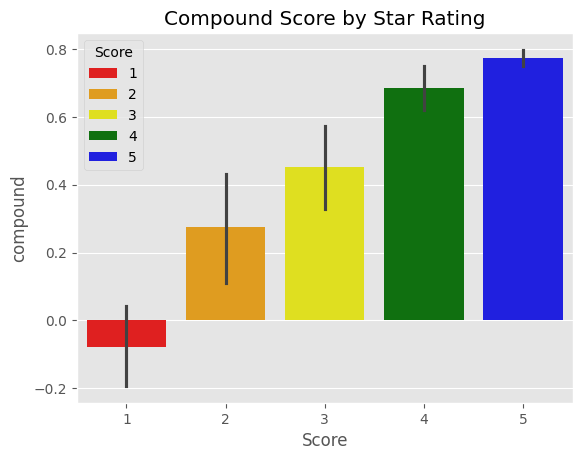

In [69]:
score_colors = {
    1: 'red',
    2: 'orange',
    3: 'yellow',
    4: 'green',
    5: 'blue'
}

# Create a palette list to match the order of Scores
palette = [score_colors[score] for score in sorted(vader['Score'].unique())]

# Create the barplot
ax = sns.barplot(data=vader, x='Score', y='compound', hue='Score', palette=palette, dodge=False)
ax.set_title('Compound Score by Star Rating')

# Remove the legend since we don't need it


# Show the plot
plt.show()

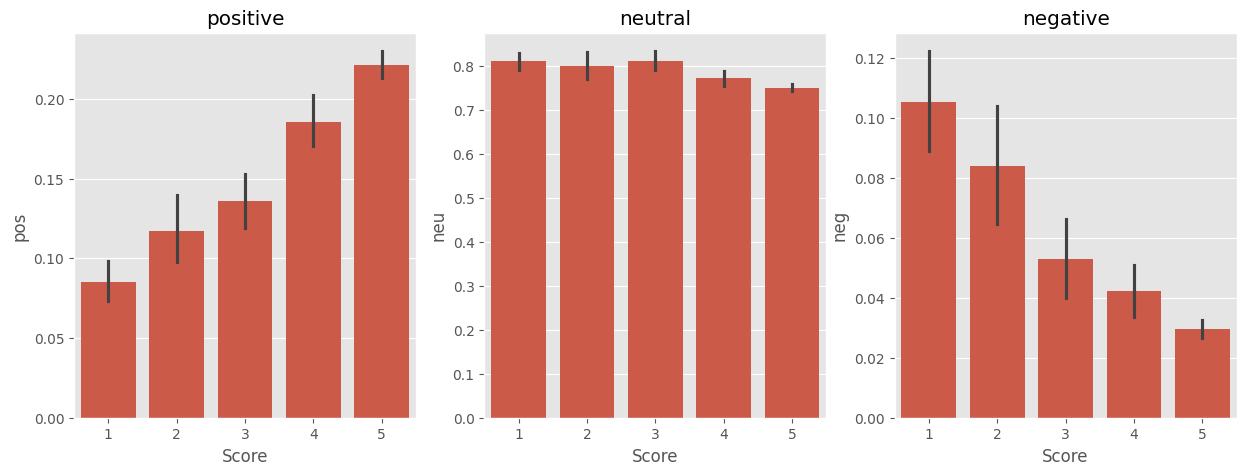

In [70]:
fig,axs = plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vader,x='Score',y='pos',ax=axs[0])
sns.barplot(data=vader,x='Score',y='neu',ax=axs[1])
sns.barplot(data=vader,x='Score',y='neg',ax=axs[2])
axs[0].set_title("positive")
axs[1].set_title("neutral")
axs[2].set_title("negative")
plt.show()

STEP 2:

ROBERTA MODEL





*   USE A MODEL TRAINED OF A LARGE CORPUS OF DATA
*   TRANSFORMER MODEL ACCOUNTS FOR WORDS BUT THE CONTEXT RELATED TO OTHER WORDS



In [71]:
pip install transformers

In [72]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
from transformers import RobertaTokenizer, RobertaForSequenceClassification


In [73]:
MODEL= f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [74]:
#vader results
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [75]:
#run for roberta model
encoded_text= tokenizer(example,return_tensors='pt')
output=model(**encoded_text)
scores=output[0][0].detach().numpy()
scores=softmax(scores)
scores_dict={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687465, 'roberta_pos': 0.0029573692}


In [76]:
def polarity_scores_roberta(example):
  encoded_text= tokenizer(example,return_tensors='pt')
  output=model(**encoded_text)
  scores=output[0][0].detach().numpy()
  scores=softmax(scores)
  scores_dict={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]
  }
  return scores_dict



In [77]:
res={}
for i, row in tqdm(df.iterrows(),total=len(df)):
  try:
    text=row['Text']
    myid=row['Id']
    vader_result=sia.polarity_scores(text)
    vader_result_rename={}
    for key, value in vader_result.items():
      vader_result_rename[f"vader_{key}"]=value
    roberta_result=polarity_scores_roberta(text)
    both={**vader_result_rename,**roberta_result}
    res[myid]=both
  except RuntimeError:
    print(f"Broke for id {myid}")


  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540
Broke for id 746
Broke for id 863


In [78]:
result_df=pd.DataFrame(res).T
result_df=result_df.reset_index().rename(columns={'index':'Id'})
result_df=result_df.merge(df,how='left')

In [80]:
result_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [81]:
result_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

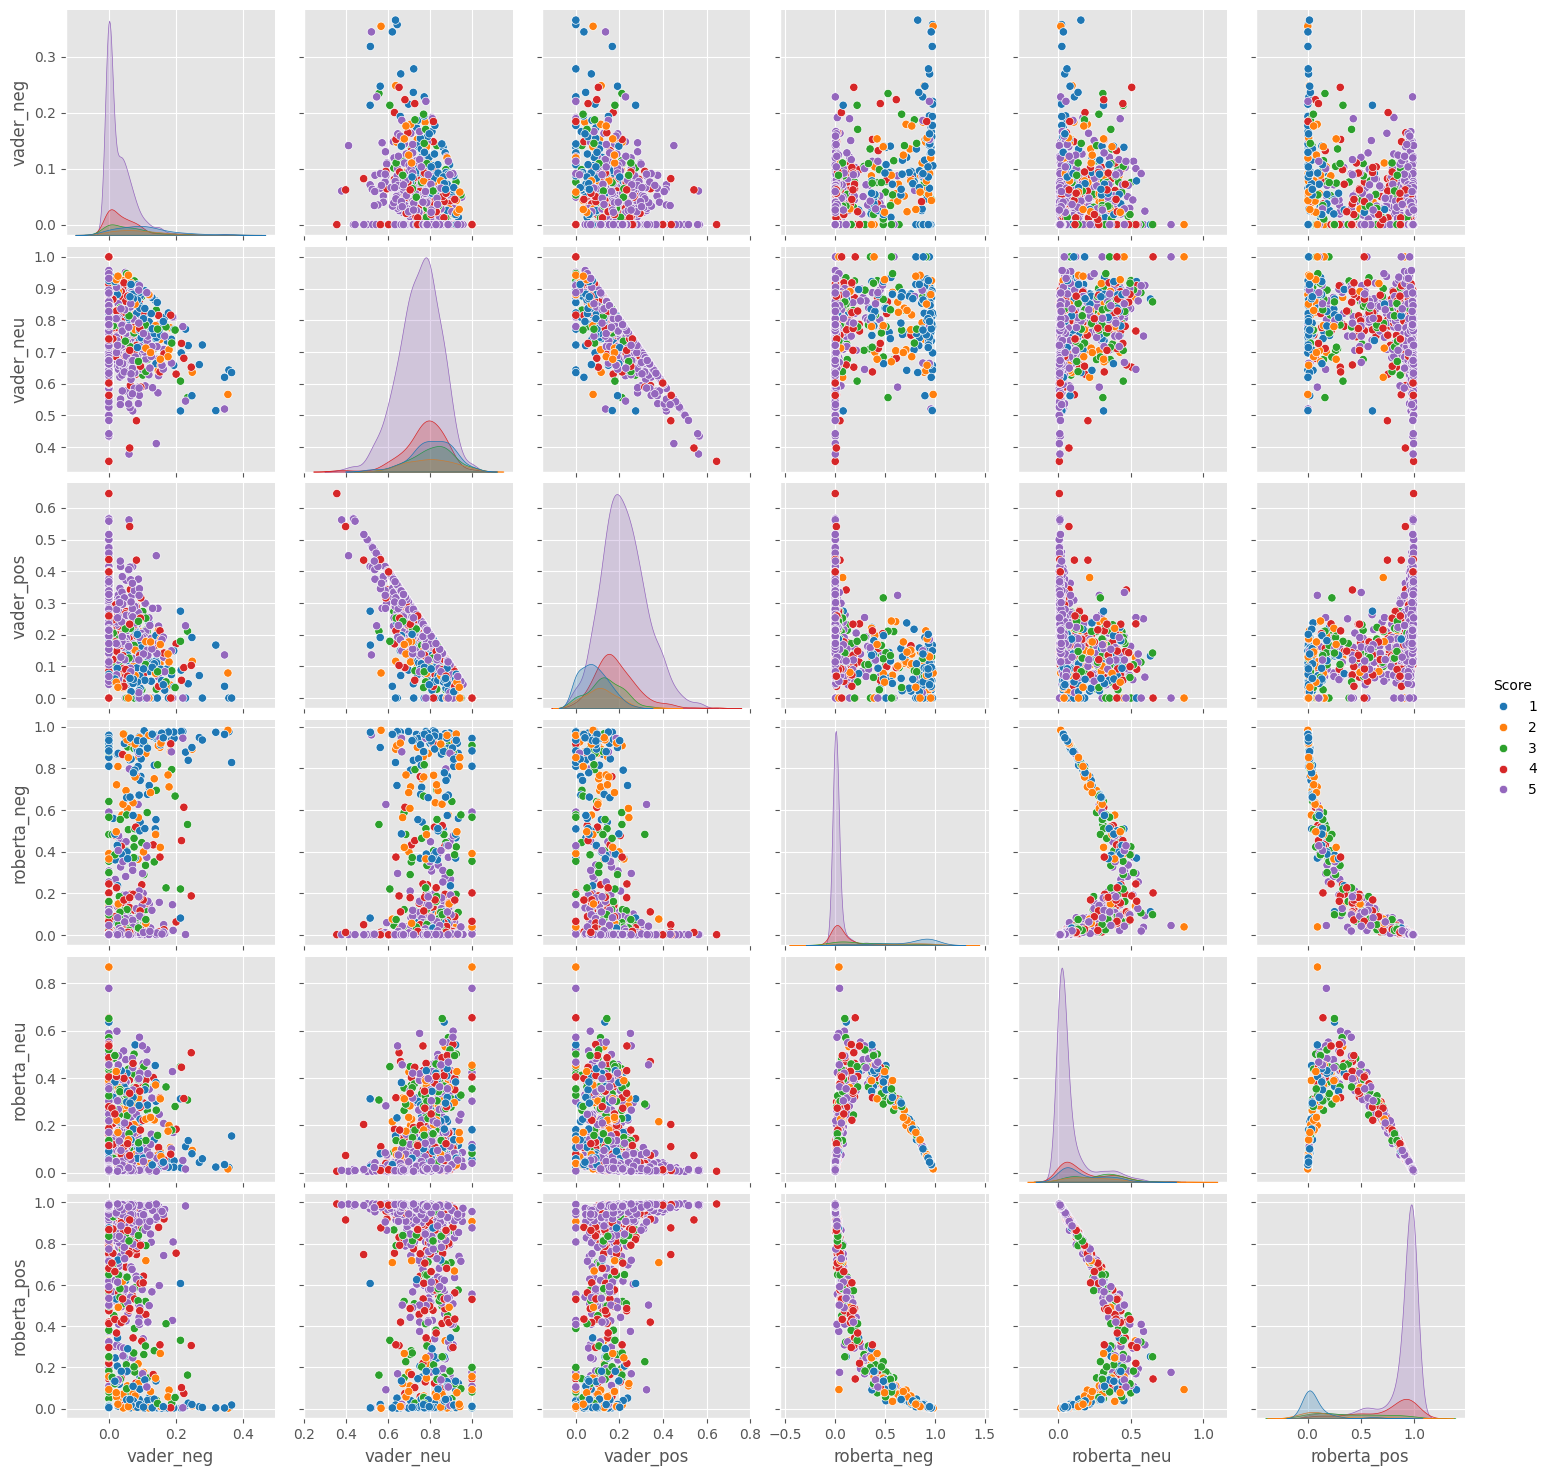

In [82]:
sns.pairplot(data=result_df,vars=['vader_neg','vader_neu','vader_pos','roberta_neg','roberta_neu','roberta_pos'],hue='Score',palette='tab10')
plt.show()

REVIEW EXAMPLES:

POSITIVE 1-STAR AND 5-NEGATIVE

In [83]:
result_df.query('Score==1').sort_values(by='roberta_pos',ascending=False)['Text'].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [84]:
result_df.query('Score==1').sort_values(by='vader_pos',ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [85]:
result_df.query('Score==5').sort_values(by='roberta_neg',ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [86]:
result_df.query('Score==5').sort_values(by='vader_neg',ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

The Transformer Pipeline

In [88]:
from transformers import pipeline
sent_pipeline=pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [89]:
sent_pipeline("i hate food")

[{'label': 'NEGATIVE', 'score': 0.9995194673538208}]

In [90]:
sent_pipeline("this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault")

[{'label': 'NEGATIVE', 'score': 0.9980344176292419}]